# Project: Investigate TMDb Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie database(TMDb) is a well known community built movie and TV Database that provide extensive metadata for movies,TV Shows and people.
>
> This data set was collected from (TMDb) that contains information about 10,000 movies including user rating and revenue.
My main focus on this project is to tring to find if there is any features that can significant influces on Top Movies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

*overview the dataset*


I initially used 'read_csv' and head code to overview this whole dataset, however there is one column 'keywords' is hidden due to too many conlumns. As I was not too sure if that column contains usefull data for this project, I used'set_option' code to find this out.

In [2]:
df = pd.read_csv('tmdb-movies.csv') 
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above code gives me an general idea of this dataset. This have totally 10866 entries with 21 columns.
There are a list of columns that has missing values listed below:
'imdb_id','cast','homepage','director','tagline','keywords','overview','genres','production_companies'

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above code gives me an general idea of whole dataset in satistic point of view. 

### Data Cleaning (Replace this with more specific notes!)

In [5]:
df.drop(['id','imdb_id','budget','revenue','homepage','tagline','keywords','overview','director','production_companies'],axis=1,inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


Remove irrelevant columns in the dataset. Note: since budget_adj and revenue_adj are more comparable data,original budget and revenue is not revelant anymore.

In [7]:
df.isnull().sum()

popularity         0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Find all useful columns that has missing values.

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

This process is to find and drop duplicates in this dataset

In [11]:
df_1=df[df.genres.notnull()]

In [12]:
df_2=df_1[df_1.cast.notnull()]

In [13]:
df_2.isnull().sum()

popularity        0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10767 non-null float64
original_title    10767 non-null object
cast              10767 non-null object
runtime           10767 non-null int64
genres            10767 non-null object
release_date      10767 non-null object
vote_count        10767 non-null int64
vote_average      10767 non-null float64
release_year      10767 non-null int64
budget_adj        10767 non-null float64
revenue_adj       10767 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1009.4+ KB


Top process is to remove all the missing values for cast and genres in the dataset. This is dataset is now clean and ready to process data analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Top 5 Movies based on features

In [15]:
profit = df_2['revenue_adj'] - df_2['budget_adj']

In [16]:
df_2['profit'] = profit

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_2.head()

,popularity,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


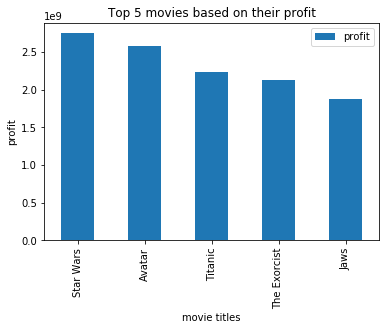

In [18]:
Top5_profit = df_2.sort_values(by=['profit'],ascending = False).head(5)
ax = Top5_profit.plot(x='original_title',y='profit',kind = 'bar',label = 'profit');
ax.set(xlabel='movie titles', ylabel='profit', title = 'Top 5 movies based on their profit')
plt.show()

Based on the top Bar chart, we can see the top 5 profit movies in history are: Star Wars,Avatar,Titanic, The Exorcist and Jaws 

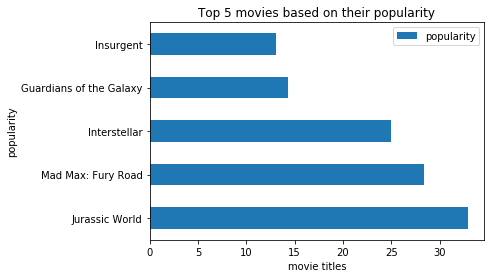

In [19]:
Top5_popular = df_2.sort_values(by=['popularity'],ascending = False).head(5)
ax = Top5_popular.plot(x='original_title',y='popularity',kind = 'barh',label = 'popularity');
ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 5 movies based on their popularity')
plt.show()

Based on the top Bar chart, we can see the top 5 popular movies in history are: Jurassic World,Mad Max:Fury Road,Interstellar,Guardians of the Galaxy and Insurgent 

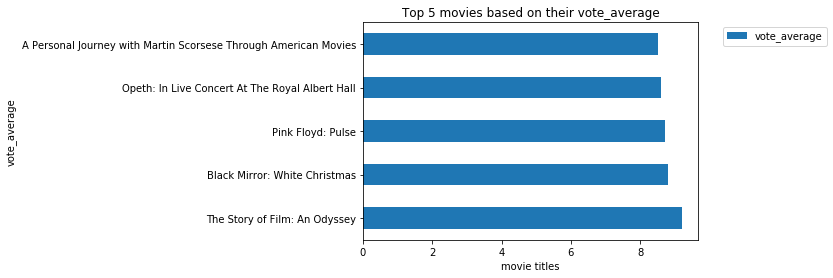

In [20]:
Top5_vote = df_2.sort_values(by=['vote_average'],ascending = False).head(5)
ax = Top5_vote.plot(x='original_title',y='vote_average',kind = 'barh',label = 'vote_average');
ax.set(xlabel='movie titles', ylabel='vote_average', title = 'Top 5 movies based on their vote_average')
plt.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.6, 0.5));

# I used this code by searching matplotlib.org/legend website as the label was covering the bar chart

Based on the top Bar chart, we can see the top 5 highest voted movies in history are: The story of Film: An Odyssey,Black Mirror:White Christmas, Pink Floyd:Pulse, Opeth: In Live Concert At The Royal Albert Hall, A personal Jurney with Martin Scorsese Through American Movies.

### Research Question 2  Correlations between profit to other features

From question 1, I can see that there is no clear feature shows that can have significant affect on Top 5 movies. Since profit for a movie is one of the important factor for investors and movie companies. I will try to find out if there is any correlations that can affect movie's profit in general.

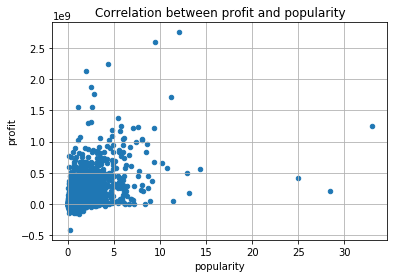

In [21]:
ax=df_2.plot(x='popularity', y='profit', kind ='scatter')
ax.set(title = 'Correlation between profit and popularity')
plt.grid()

Based on top scatter plot, I can see that there is no clear trend shows the relationship between popularity and profit. Most of the movies are in low popularity with low profit area. However, some extreme examples can be found in this plot such as movies have high popularity and with low profit or movies have low popularity and with high profit.

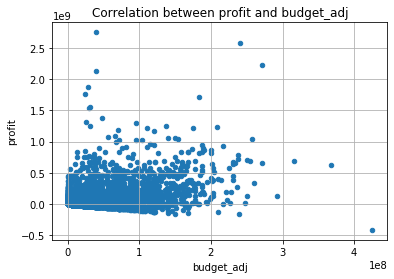

In [22]:
ax=df_2.plot(x='budget_adj', y='profit', kind ='scatter')
ax.set(title = 'Correlation between profit and budget_adj')
plt.grid()

Based on top scatter plot, I can see that there is no clear trend shows the relationship between budget and profit. Most of the movies are in standard range from 0 to 2 of budget amount. However, some extreme examples can be found in this plot such as movies have high profit with low budget or movies have high budget and with negative profit.

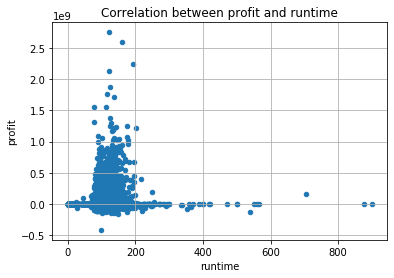

In [23]:
ax=df_2.plot(x='runtime', y='profit', kind ='scatter')
ax.set(title = 'Correlation between profit and runtime')
plt.grid()

Based on top scatter plot, there is no clear trend shows strong relationship between profit and runtime. Most of the movies have runtime from 0 to 200 mins. However, I can see when movie runtime gets longer than 200 mins,profit tend to move toward zero.

<a id='conclusions'></a>
## Conclusions

>This data set contains a lot useful information for me to process data analysis. In general,this data set is very clean. Most data types are matching with analysing requirement, however I do need to remove some null and duplicate values. This can be a limitation if questions are pointed to those areas. For example, analyzing questions around cast and genres can be difficult as they can be the factors that influnces movie performance but they have many missing values.

> Based on my analysis above for question 1, I can see that there is no clear features can show a significant influence on top 5 movies. Top movies totally changed every time when I use different factors such as profit, popularity and vote_average. 

> Based on qeusiton 2, it is also sadly say that there are no strong correlation between profit and other factors. This means that movie's popularity, runtime and adj_budget will not influence movie's profitbility.


